# Business Understanding

Business Questions to answer
#### Which programming langauges are the most popular?
#### Which programming languages are increasing in popularity?
#### Knowledge of which programming langauges contributes to the highest average salaries? 
#### How are these average salaries changing over the last five years?

# Data Understanding

This data was downloaded from the Stack Overflow Annual Developer Survey. Survey responses for the years 2018 though 2022 were downloaded as a CSV. The schema was studied to gain a better understanding of the questions asked. 

In [39]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Prepare Data

In [40]:
#read in datasets, aggregate into one dataset

dataframes = []

#using time period of 5 years of surveys
years = ['2018','2019','2020','2021','2022']

for year in years:
    file_name = f"survey_results_public_{year}.csv"
    df = pd.read_csv(file_name)
    df['year'] = year
    
    #rename variable for for years 2018, 2019, and 2020 due to different column names
    if year in ['2018','2019','2020']:
        df = df[['year','LanguageWorkedWith']]
        df = df.rename(columns = {'LanguageWorkedWith':'LanguageHaveWorkedWith'})
    else:
        df = df[['year','LanguageHaveWorkedWith']]
    
    
    dataframes.append(df)

aggregated_df = pd.concat(dataframes, ignore_index=True)

C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\2011397185.py:8: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


## Explore the data

In [42]:
for year in years:
    df_year = aggregated_df[aggregated_df['year'] == year]
    print(f"Year {year}: {len(df_year)} rows")

Year 2018: 98855 rows
Year 2019: 88883 rows
Year 2020: 64461 rows
Year 2021: 83439 rows
Year 2022: 73268 rows


In [43]:
for year in years:
    df_year = aggregated_df[aggregated_df['year'] == year]
    num_languages = df_year['LanguageHaveWorkedWith'].count()
    print(f"Year {year}: {num_languages} non-missing 'LanguageHaveWorkedWith' values")

Year 2018: 78334 non-missing 'LanguageHaveWorkedWith' values
Year 2019: 87569 non-missing 'LanguageHaveWorkedWith' values
Year 2020: 57378 non-missing 'LanguageHaveWorkedWith' values
Year 2021: 82357 non-missing 'LanguageHaveWorkedWith' values
Year 2022: 70975 non-missing 'LanguageHaveWorkedWith' values


## Question 1: Analyze most popular languages over 5 year span

In [44]:
def split_languages(df):
    
    """
    This function calculates the count of each language in the dataframe that exists in the semi colon separated string in the 'LanguagesHaveWorkWith' column
    Input: dataframe to be processed
    Output: Dictionary where language is the key and count of the language is the value
    """
    
    
    language_count = {}
    for languages in df['LanguageHaveWorkedWith']:

        if pd.isna(languages):
            continue
        for language in languages.split(';'):
            if language in language_count:
                language_count[language] += 1
            else: language_count[language] = 1
                
             
    return language_count

In [45]:
language_counts_total = split_languages(aggregated_df)
#sort the lists based on the count
sorted_languages = sorted(language_counts_total.items(), key=lambda x: x[1], reverse=True)
sorted_languages

[('JavaScript', 252757),
 ('SQL', 197589),
 ('HTML/CSS', 177048),
 ('Python', 166036),
 ('Java', 147318),
 ('C#', 114959),
 ('TypeScript', 96388),
 ('PHP', 95065),
 ('C++', 90184),
 ('C', 79567),
 ('Bash/Shell', 74213),
 ('HTML', 53628),
 ('CSS', 50979),
 ('Bash/Shell/PowerShell', 50971),
 ('Go', 33572),
 ('Ruby', 29156),
 ('Node.js', 27975),
 ('Kotlin', 26969),
 ('Assembly', 23665),
 ('Swift', 23144),
 ('R', 20642),
 ('Rust', 20004),
 ('VBA', 19122),
 ('PowerShell', 17446),
 ('Objective-C', 16049),
 ('Dart', 13576),
 ('Scala', 12766),
 ('Perl', 8748),
 ('Matlab', 8410),
 ('Groovy', 8209),
 ('Other(s):', 7920),
 ('Haskell', 6509),
 ('Lua', 5600),
 ('VB.NET', 5254),
 ('Clojure', 4908),
 ('Elixir', 4226),
 ('Delphi', 4042),
 ('F#', 3622),
 ('Julia', 3101),
 ('Visual Basic 6', 3087),
 ('Erlang', 2955),
 ('MATLAB', 2913),
 ('CoffeeScript', 2603),
 ('LISP', 2028),
 ('Delphi/Object Pascal', 2025),
 ('APL', 1040),
 ('Solidity', 1031),
 ('WebAssembly', 1015),
 ('COBOL', 901),
 ('Crystal', 806)

In [46]:
#number of unique languages over the aggregated dataset
len(sorted_languages)

56

In [47]:
top_ten = sorted_languages[:10]
top_ten

[('JavaScript', 252757),
 ('SQL', 197589),
 ('HTML/CSS', 177048),
 ('Python', 166036),
 ('Java', 147318),
 ('C#', 114959),
 ('TypeScript', 96388),
 ('PHP', 95065),
 ('C++', 90184),
 ('C', 79567)]

## Plot the top 10

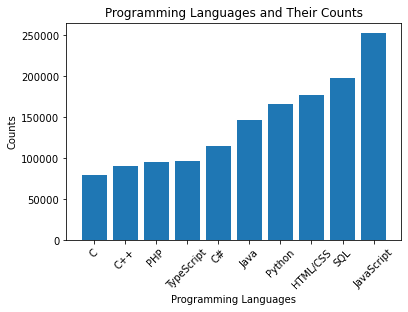

In [48]:
#plot the counts of each language in the top 10
languages, counts = zip(*top_ten[::-1])
plt.bar(languages, counts)
plt.xlabel('Programming Languages')
plt.ylabel('Counts')
plt.title('Programming Languages and Their Counts')
plt.xticks(rotation=45)
plt.show()

In [49]:
top_ten_list = [language for language, count in top_ten]

In [50]:
top_ten_list

['JavaScript',
 'SQL',
 'HTML/CSS',
 'Python',
 'Java',
 'C#',
 'TypeScript',
 'PHP',
 'C++',
 'C']

## Look at top langauges per year

In [51]:
def split_languages_top_ten(df):
    
    """
    This function calculates the count of the top ten languages in the dataframe that exists in the semi colon separated string in the 'LanguagesHaveWorkWith' column
    Similar to other function with added filter of only adding to list if language is in the top_ten_list
    Input: dataframe to be processed
    Output: Dictionary where the top-ten language is the key and count of the language is the value
    """
    
    
    language_count = {}
    for languages in df['LanguageHaveWorkedWith']:

        if pd.isna(languages):
            continue
        for language in languages.split(';'):
            if language in top_ten_list:
                if language in language_count:
                    language_count[language] += 1
                else: language_count[language] = 1
                
             
    return language_count

In [52]:
language_counts_per_year = {}

#for every year, find the count of each language
for year in years:
    df_year = aggregated_df[aggregated_df['year'] == year]
    language_counts = split_languages_top_ten(df_year)
    language_counts_per_year[year] = language_counts

language_counts_df = pd.DataFrame(language_counts_per_year)



In [53]:
language_counts_df.head(10)

,2018,2019,2020,2021,2022
JavaScript,54686.0,59219,38822,53587,46443
Python,30359.0,36443,25287,39792,34155
C#,26954.0,27097,18041,22984,19883
SQL,44670.0,47544,31413,38835,35127
TypeScript,13626.0,18523,14578,24909,24752
C,18042.0,18017,12487,17329,13692
C++,19872.0,20524,13707,20057,16024
Java,35521.0,35917,23074,29162,23644
PHP,24071.0,23030,15007,18130,14827
HTML/CSS,NaN,55466,36181,46259,39142


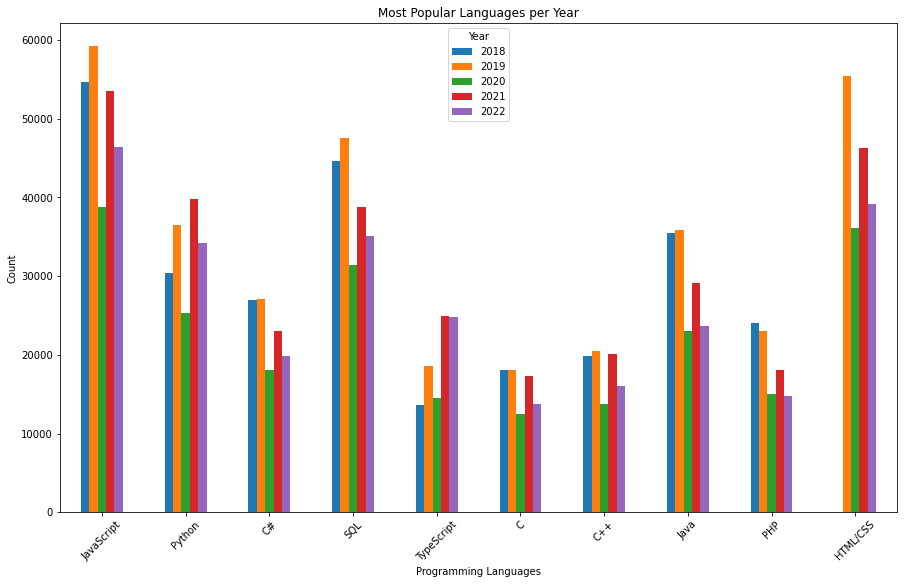

In [54]:
    #plot the language and its count
    language_counts_df = language_counts_df.sort_index(axis=1, ascending=True)
    ax = language_counts_df.plot(kind='bar', figsize=(15, 9), rot=45)
    ax.set_xlabel('Programming Languages')
    ax.set_ylabel('Count')
    ax.set_title('Most Popular Languages per Year')
    plt.legend(title='Year')
    plt.show()

Text(0.5, 1.0, 'Most Popular Languages per Year')

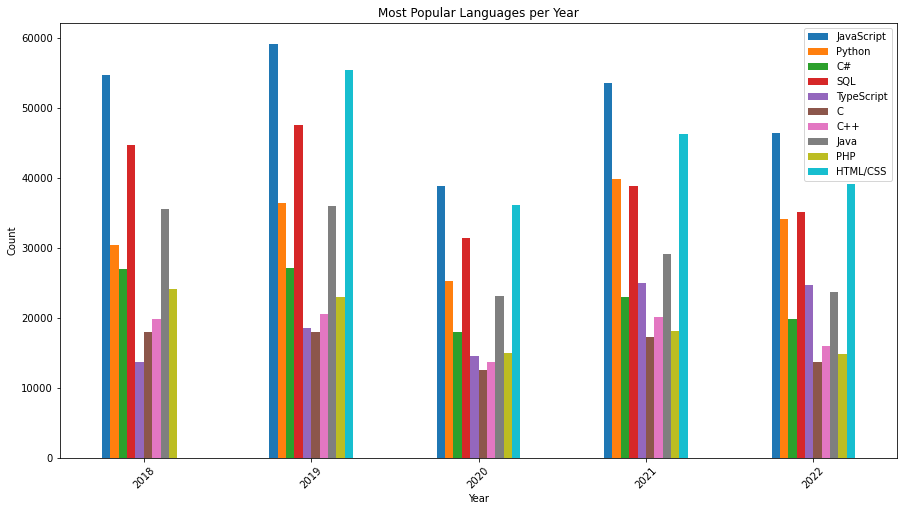

In [55]:
#transpose the dataframe and plot
transposed_language_counts_df = language_counts_df.transpose()

ax = transposed_language_counts_df.plot(kind='bar', figsize=(15, 8), rot=45)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Most Popular Languages per Year')

In [56]:
transposed_language_counts_df.head(10)

,JavaScript,Python,C#,SQL,TypeScript,C,C++,Java,PHP,HTML/CSS
2018,54686.0,30359.0,26954.0,44670.0,13626.0,18042.0,19872.0,35521.0,24071.0,NaN
2019,59219.0,36443.0,27097.0,47544.0,18523.0,18017.0,20524.0,35917.0,23030.0,55466.0
2020,38822.0,25287.0,18041.0,31413.0,14578.0,12487.0,13707.0,23074.0,15007.0,36181.0
2021,53587.0,39792.0,22984.0,38835.0,24909.0,17329.0,20057.0,29162.0,18130.0,46259.0
2022,46443.0,34155.0,19883.0,35127.0,24752.0,13692.0,16024.0,23644.0,14827.0,39142.0


## Questions 2: Look at proportion changes over the 5 years

In [57]:
#look at proportions
proportions_df = pd.DataFrame(columns=['Language', 'Year', 'Proportion'])

#cycle through top ten list and years and find proportion of non-null rows that contain language in that year
for l in top_ten_list:
    for y in years:
        temp_df = aggregated_df[aggregated_df['year'] == y]
        # Check for non-null values in the 'LanguageHaveWorkedWith' column
        temp_df = temp_df[temp_df['LanguageHaveWorkedWith'].notnull()] #for purposes of this question, we will drop nulls because we are only interested in people who answered the language question
        count = temp_df['LanguageHaveWorkedWith'].str.split(';').apply(lambda x: l in x).sum()
        proportion = count / len(temp_df)
        proportions_df = proportions_df.append({'Language': l, 'Year': y, 'Proportion': proportion}, ignore_index=True)


C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\1103716119.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  proportions_df = proportions_df.append({'Language': l, 'Year': y, 'Proportion': proportion}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\1103716119.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  proportions_df = proportions_df.append({'Language': l, 'Year': y, 'Proportion': proportion}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\1103716119.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  proportions_df = proportions_df.append({'Language': l, 'Year': y, 'Proportion': proportion}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\11037

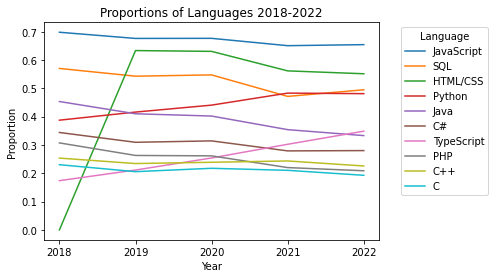

In [59]:
#plot the proportions in a line graph

for l in proportions_df['Language'].unique():
    language_df = proportions_df[proportions_df['Language'] == l]
    plt.plot(language_df['Year'], language_df['Proportion'], label=l)
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Proportions of Languages 2018-2022')
plt.show()

## Question 3: Look at average Salary per language

In [60]:
#the different column names for compensation column 
#2018 - ConvertedSalary
#2019 - ConvertedComp
#2020 - ConvertedComp
#2021 - ConvertedCompYearly
#2022 - ConvertedCompYearly

In [61]:
#read in datasets, aggregate into one dataset

dataframes = []
years = ['2018','2019','2020','2021','2022']

for year in years:
    file_name = f"survey_results_public_{year}.csv"
    df = pd.read_csv(file_name)
    df['year'] = year
    
    if year in ['2018'] :
        df = df[['year','LanguageWorkedWith','ConvertedSalary']]
        df = df.rename(columns = {'LanguageWorkedWith':'LanguageHaveWorkedWith','ConvertedSalary':'Salary'})
        
    elif year in ['2019','2020']:
        df = df[['year','LanguageWorkedWith','ConvertedComp']]
        df = df.rename(columns = {'LanguageWorkedWith':'LanguageHaveWorkedWith','ConvertedComp':'Salary'})
    elif year in ['2021','2022']:
        df = df[['year','LanguageHaveWorkedWith','ConvertedCompYearly']]
        df = df.rename(columns = {'ConvertedCompYearly':'Salary'})
        
    
    #select necessary columns
    #rename columns to match
    
    dataframes.append(df)

aggregated_salary_df = pd.concat(dataframes, ignore_index=True)

C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\3558081941.py:8: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [62]:
aggregated_salary_df.head()

,year,LanguageHaveWorkedWith,Salary
0,2018,JavaScript;Python;HTML;CSS,NaN
1,2018,JavaScript;Python;Bash/Shell,70841.0
2,2018,NaN,NaN
3,2018,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,NaN
4,2018,C;C++;Java;Matlab;R;SQL;Bash/Shell,21426.0


In [63]:
aggregated_salary_df['year'].value_counts()

2018    98855
2019    88883
2021    83439
2022    73268
2020    64461
Name: year, dtype: int64

In [64]:
#we will drop nulls so that we can compute the average over the people who did respond
aggregated_salary_df = aggregated_salary_df.dropna()

In [65]:
average_salary_df = pd.DataFrame(columns=['Language', 'AverageSalary'])

#for every language, find the average salary for all rows that contain the language across all years
for l in top_ten_list:
    temp_df = aggregated_salary_df[aggregated_salary_df['LanguageHaveWorkedWith'].str.split(';').apply(lambda x: l in x)]
    average_sal = temp_df['Salary'].mean()
    average_salary_df = average_salary_df.append({'Language': l, 'AverageSalary': average_sal}, ignore_index=True)

C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\3671124578.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_salary_df = average_salary_df.append({'Language': l, 'AverageSalary': average_sal}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\3671124578.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_salary_df = average_salary_df.append({'Language': l, 'AverageSalary': average_sal}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\3671124578.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_salary_df = average_salary_df.append({'Language': l, 'AverageSalary': average_sal}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\3671124578.

In [66]:
average_salary_df.head(10)

,Language,AverageSalary
0,JavaScript,121217.936664
1,SQL,122972.520897
2,HTML/CSS,122707.591854
3,Python,134241.545865
4,Java,117154.691037
5,C#,125527.409512
6,TypeScript,134675.049355
7,PHP,95943.664814
8,C++,123443.975147
9,C,119652.852538


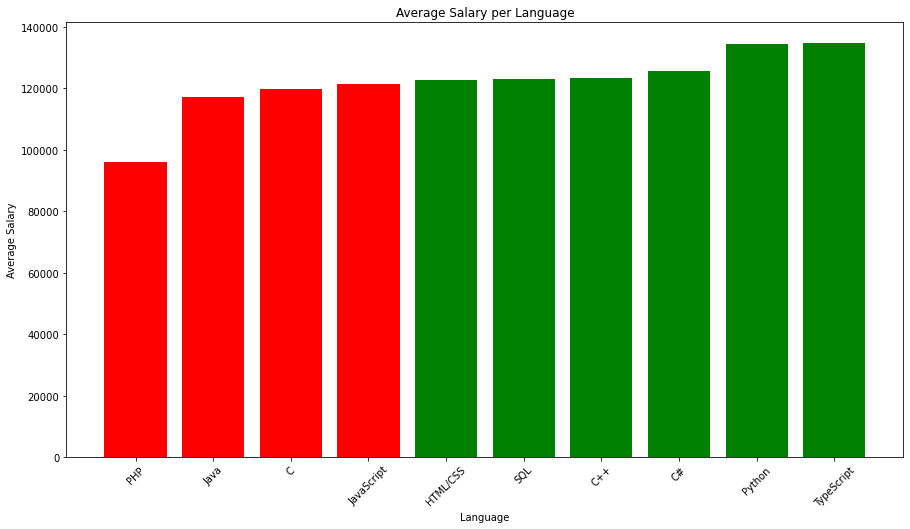

In [67]:
average_salary_df = average_salary_df.sort_values('AverageSalary', ascending=True)
#find the total average over all languages in the top ten to be used for coloring
total_average = average_salary_df['AverageSalary'].mean()
average_salary_df = average_salary_df.set_index('Language')

#set the color to green when it is above the average
colors = average_salary_df['AverageSalary'].apply(lambda salary: 'red' if salary <= total_average else 'green').tolist()

#plot the graph
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(average_salary_df.index, average_salary_df['AverageSalary'], color=colors)
ax.set_xlabel('Language')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary per Language')
plt.xticks(rotation=45)
plt.show()

In [68]:
total_average

121753.72376827714

In [69]:
average_salary_df.head(10)

,AverageSalary
Language,
PHP,95943.664814
Java,117154.691037
C,119652.852538
JavaScript,121217.936664
HTML/CSS,122707.591854
SQL,122972.520897
C++,123443.975147
C#,125527.409512
Python,134241.545865


## Question 4: Look at how average salary is changing over 5 years for each language

In [72]:
average_salary_year_df = pd.DataFrame(columns=['Year','Language', 'AverageSalary'])

#cycle through top ten language and year and find the average salary for rows that contain that language for every year
for l in top_ten_list:
    for y in years:
        temp_df = aggregated_salary_df[aggregated_salary_df['year'] == y]
        temp_df = temp_df[temp_df['LanguageHaveWorkedWith'].str.split(';').apply(lambda x: l in x)]
        average_sal = temp_df['Salary'].mean()
        average_salary_year_df = average_salary_year_df.append({'Year': y, 'Language': l, 'AverageSalary': average_sal}, ignore_index=True)

C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\2572933376.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_salary_year_df = average_salary_year_df.append({'Year': y, 'Language': l, 'AverageSalary': average_sal}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\2572933376.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_salary_year_df = average_salary_year_df.append({'Year': y, 'Language': l, 'AverageSalary': average_sal}, ignore_index=True)
C:\Users\kp6829\AppData\Local\Temp\ipykernel_2928\2572933376.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_salary_year_df = average_salary_year_df.append({'Year': y, 'Language': l, 'AverageSalary': average_sal}, ignore_index=True

In [73]:
average_salary_year_df.head(50)

,Year,Language,AverageSalary
0,2018,JavaScript,97974.171459
1,2019,JavaScript,127492.880986
2,2020,JavaScript,102280.804691
3,2021,JavaScript,114864.940138
4,2022,JavaScript,168470.53402
5,2018,SQL,97567.427165
6,2019,SQL,128448.336607
7,2020,SQL,103281.520372
8,2021,SQL,117631.481022
9,2022,SQL,174652.808734


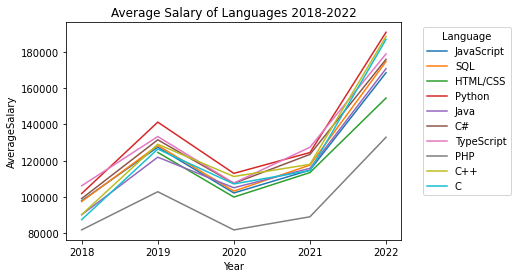

In [74]:
#plot the line graph

for l in average_salary_year_df['Language'].unique():
    language_df = average_salary_year_df[average_salary_year_df['Language'] == l]
    plt.plot(language_df['Year'], language_df['AverageSalary'], label=l)
plt.xlabel('Year')
plt.ylabel('AverageSalary')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Salary of Languages 2018-2022')
plt.show()

Explanations of the visuals and a summary of the key findings can be found in detail in my blog post at:
https://medium.com/@kevinpolitz/which-programming-language-should-you-learn-907f26b9de8f